# practicing 

practicing implementing perceptron through a tutorial because python ruined my programming skills :(

based on tutorials from python simplified (https://www.youtube.com/playlist?list=PLqXS1b2lRpYTpUIEu3oxfhhTuBXmMPppA)

the perceptron has a set of weights that can classify an input as a class

### step 1 (base perceptron)
basic perceptron that will activate depending on how its weights interpret the input array

In [3]:
x_input = [0.1, 0.5, 0.2]
w_weights = [0.4, 0.3, 0.6]
threshold = 0.5

def activate(weighted_sum):

    if weighted_sum > threshold:
        return True
    else:
        return False

def perceptron():
    weighted_sum = 0

    for x,w in zip(x_input, w_weights):
        weighted_sum += (x*w)
        print(weighted_sum)

    return activate(weighted_sum) 

output = perceptron()
print(output)

0.04000000000000001
0.19
0.31
False


### step 2 (loss function)

In [6]:
import math

# weighted_sum and classification
input_data = [(0.26, 1),
              (0.2, 0),
              (0.48, 1),
              (0.3, 0)]

def cross_entropy(input_data):
    loss = 0
    n = len(input_data)

    for entry in input_data:
        w_sum = entry[0]
        y = entry[1]

        loss += -(y*math.log10(w_sum) + (1-y)*math.log10(1-w_sum))
        print(loss)

    return loss/n

error_term = cross_entropy(input_data)
print(error_term)

0.585026652029182
0.6819366650372384
1.000695427661651
1.1555973876473944
0.2888993469118486


### step 3 (gradient descent)

now using sigmoid function for activation function

In [33]:
import numpy as np

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def predict(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def cross_entropy(target, pred):
    return -(target*np.log10(pred) + (1-target)*(np.log10(1-pred))) 

def gradient_descent(x, y, weigths, bias, l_rate, pred):
    new_weights = []

    bias += l_rate*(y-pred)

    for x,w in zip(weights, x):
        new_w = w + l_rate * (y-pred)*x
        new_weights.append(new_w)

    return new_weights, bias

features = np.array(([0.1,0.5,0.2],[0.2,0.3,0.1],[0.7,0.4,0.2],[0.1,0.4,0.3]))
targets = np.array([0,1,0,1])
epochs = 10
learnrate = 0.1
errors = []
weights = np.array([0.4, 0.2, 0.6])
bias = 0.5

new_weights = []

for e in range(epochs):
    for x, y in zip(features, targets):
        pred = predict(x, weights, bias)
        error = cross_entropy(y, pred)
        weights, bias = gradient_descent(x, y, weights, bias, learnrate, pred)
    
    out = predict(features, weights, bias)
    loss = np.mean(cross_entropy(targets, out))
    errors.append(loss)
    print("\n========== epoch", e,"==========")
    print("average loss: ", loss)


========== epoch 0 ==========
average loss:  0.3345374681272344

========== epoch 1 ==========
average loss:  0.33031567407144574

========== epoch 2 ==========
average loss:  0.32678800565834515

========== epoch 3 ==========
average loss:  0.3238477427422666

========== epoch 4 ==========
average loss:  0.32140203133813955

========== epoch 5 ==========
average loss:  0.31937090493551745

========== epoch 6 ==========
average loss:  0.31768609839842976

========== epoch 7 ==========
average loss:  0.31628975472305754

========== epoch 8 ==========
average loss:  0.3151331270173363

========== epoch 9 ==========
average loss:  0.31417534158452715


### step 4 (everything together)

In [23]:
import numpy as np
from functions import generate_data

bias = 0.5
l_rate = 0.025
epochs = 50
epoch_loss = []

data, weights = generate_data(50, 3)

#functions
def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias
    
def sigmoid_activation(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []

    for x,w in zip(feature, weights):
        new_w = w + l_rate*(target - prediction)*x
        new_weights.append(new_w)

    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        losses = []
        
        for i in range(len(data)):
            feature = data.loc[i][:-1]
            target = data.loc[i][-1]
        
            w_sum = get_weighted_sum(feature, weights, bias)
            #print(w_sum)
            pred = sigmoid_activation(w_sum)
            #print(pred)
            loss = cross_entropy(target, pred)
            losses.append(loss)
            #print(loss)
        
            # training function 
            weights = update_weights(weights, l_rate, target, pred, feature)
            bias = update_bias(bias, l_rate, target, pred)

        average_loss = sum(losses)/len(losses)
        epoch_loss.append(average_loss)
        print("--------")
        print("epoch ", e)
        print("avg_loss: ", average_loss)

train_model(data, weights, bias, l_rate, epochs)
    
    

generated features:
[[0.27938496 0.82214874 0.22996632]
 [0.65373024 0.76931984 0.53961113]
 [0.8650409  0.98796615 0.74341538]
 [0.72765738 0.54315547 0.94932558]
 [0.53519297 0.79589594 0.15434291]
 [0.84875574 0.6625249  0.89263527]
 [0.46558042 0.66812235 0.40483455]
 [0.05706007 0.1663271  0.5007384 ]
 [0.82739566 0.1441035  0.75676916]
 [0.66186011 0.56583263 0.04893864]
 [0.44142144 0.67311681 0.74313993]
 [0.97475136 0.76253203 0.14161403]
 [0.80102627 0.50816292 0.13576468]
 [0.7272591  0.63129746 0.85341186]
 [0.727246   0.76612172 0.0079473 ]
 [0.35566959 0.85904503 0.82978067]
 [0.56388673 0.09172863 0.20110417]
 [0.43403901 0.69291722 0.37029372]
 [0.92091402 0.27879775 0.309673  ]
 [0.18694469 0.88862231 0.50091306]
 [0.81839613 0.07589    0.33341727]
 [0.46398128 0.49567886 0.04387585]
 [0.83328335 0.99502836 0.10314815]
 [0.29419428 0.08263705 0.53242595]
 [0.50078162 0.615095   0.47139628]
 [0.91904938 0.07365257 0.74853884]
 [0.55708835 0.54102409 0.71118551]
 [0.2035

/tmp/ipykernel_11935/3305454241.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target = data.loc[i][-1]


### plotting results

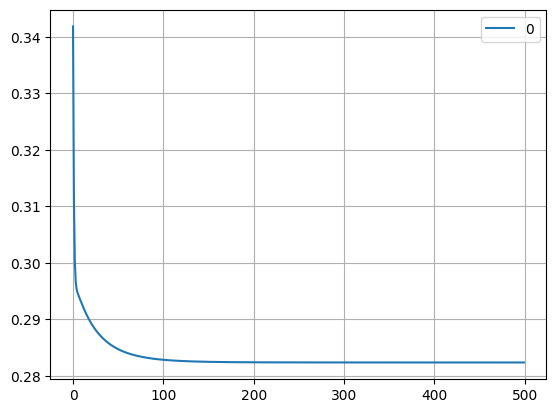

In [21]:
import pandas as pd

df = pd.DataFrame(epoch_loss)
df_plot = df.plot(kind="line", grid=True).get_figure()
df_plot.savefig("training_loss.pdf")